# Relação entre Continuidade, Integrabilidade, Derivabilidade e Convergência Uniforme

Este notebook explora a relação entre a convergência uniforme de sequências de funções e as propriedades fundamentais da análise, como continuidade, integrabilidade e derivabilidade. Vamos analisar os principais teoremas e ilustrar os conceitos com exemplos e gráficos.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import warnings

warnings.filterwarnings('ignore')

# Configurações de plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## 2. Convergência Pontual vs. Convergência Uniforme

A noção de convergência para sequências de funções pode ser definida de maneiras diferentes. As duas mais importantes são a convergência pontual e a convergência uniforme.
<!-- Definicao formal baseada em Bartle e Sherbert -->
### Convergência Pontual


Dizemos que uma sequência de funções $(f_n)$ definidas em um conjunto $X$ converge **pontualmente** para uma função $f$ se, para cada ponto $x \in X$, a sequência de números reais $(f_n(x))$ converge para $f(x)$.

**Definição Formal:**

Seja $(f_n)$ uma sequência de funções definidas em um conjunto $A \subseteq \mathbb{R}$ a $\mathbb{R}$. Seja $A_0 \subseteq A$ e seja $f: A_0 \to \mathbb{R}$. Dizemos que a sequência $(f_n)$ converge em $A_0$ para $f$ se, para cada $x \in A_0$, a sequência de números reais $(f_n(x))$ converge para $f(x)$ em $\mathbb{R}$. 

Quando tal função $f$ existe, dizemos que a sequencia $(f_n)$ é convergente em $A_0$, ou que converge pontualmente em $A_0$. Simbolicamente, escrevemos:
$$ \lim_{n \to \infty} f_n(x) = f(x), \quad \text{para cada } x \in A_0. $$
ou
$$ f_n \to f \text{ em } A_0. $$

#### Exemplo 1: $f_n(x) = x^n$ em $[0, 1]$

Esta sequência converge pontualmente para a função $f(x)$ definida como:
$$ f(x) = \begin{cases} 0, & \text{se } 0 \le x < 1 \\ 1, & \text{se } x = 1 \end{cases} $$

Vamos visualizar essa convergência.

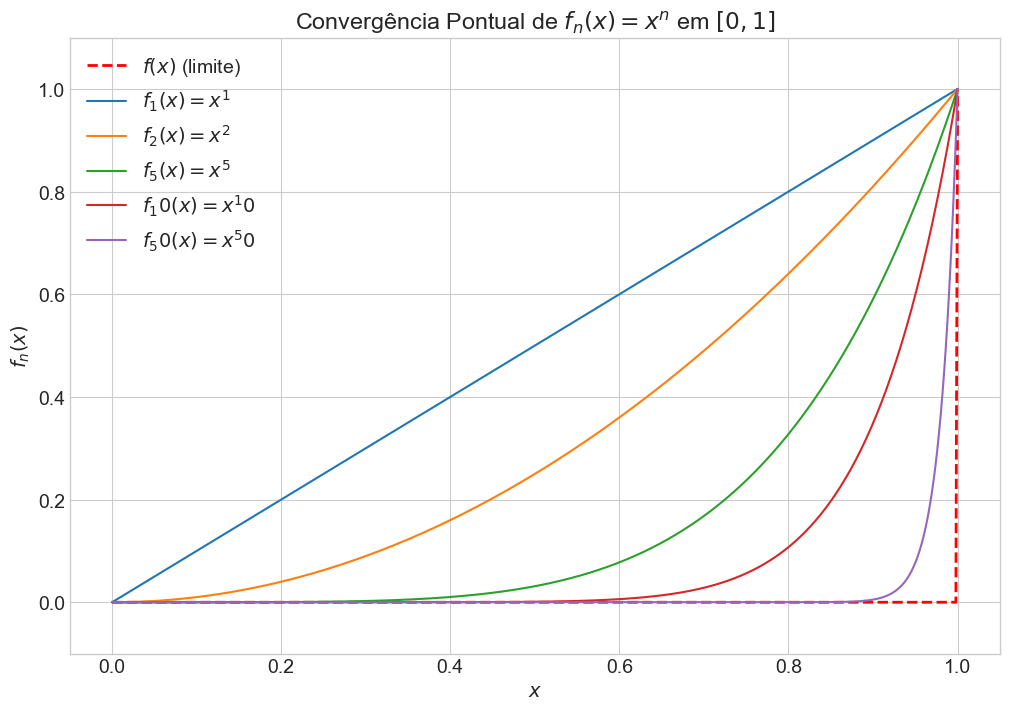

In [6]:
def plot_pointwise_convergence():
    x = np.linspace(0, 1, 500)
    
    # Função limite
    f_limit = np.zeros_like(x)
    f_limit[-1] = 1
    
    plt.figure(figsize=(12, 8))
    
    # Plot da função limite
    plt.plot(x, f_limit, 'r--', lw=2, label='$f(x)$ (limite)')
    
    # Plot de algumas funções da sequência
    for n in [1, 2, 5, 10, 50]:
        f_n = x**n
        plt.plot(x, f_n, label=f'$f_{n}(x) = x^{n}$' if n in [1, 2, 5, 10, 50] else "")

    plt.title('Convergência Pontual de $f_n(x) = x^n$ em $[0, 1]$')
    plt.xlabel('$x$')
    plt.ylabel('$f_n(x)$')
    plt.legend()
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.show()

plot_pointwise_convergence()

### Convergência Uniforme

A convergência uniforme é uma noção mais forte. Dizemos que $(f_n)$ converge **uniformemente** para $f$ em $X$ se a "velocidade" da convergência não depende do ponto $x$.

**Definição Formal:** A sequência de funções $(f_n)$ em $A \subseteq \mathbb{R}$ converge uniformemente em $A_0 \subseteq A$ para uma função $f: A_0 \to \mathbb{R}$ se, para todo $\varepsilon > 0$, existe um número natural $N (\varepsilon)$ (que depende **apenas** de $\varepsilon$) tal que, para todo $n \ge N$ e para todo $x \in A_0$, temos:
$$ |f_n(x) - f(x)| < \varepsilon \quad \text{para todo } x \in A_0. $$

Neste case, escrevemos:
$$ f_n \xrightarrow{u} f \text{ em } A_0. $$
ou
$$ f_n(x) \xrightarrow{u} f(x) \text{ em } A_0. $$

Geometricamente, isso significa que, para $n \ge N$, o gráfico de $f_n$ está inteiramente contido em um "tubo" de raio $\varepsilon$ ao redor do gráfico de $f$.

#### Exemplo 2: $f_n(x) = \frac{\sin(nx + x)}{n}$

Esta sequência converge uniformemente para $f(x) = 0$ em $\mathbb{R}$.
$$ |f_n(x) - 0| = \left| \frac{\sin(nx + x)}{n} \right| \le \frac{1}{n} $$
Dado $\varepsilon > 0$, podemos escolher $N > 1/\varepsilon$. Para $n \ge N$, teremos $|f_n(x) - 0| \le 1/n \le 1/N < \varepsilon$ para **todos** os $x$.

Vamos visualizar o tubo de $\varepsilon$.

In [7]:
def plot_uniform_convergence(n_val=1, epsilon_val=0.5):
    x = np.linspace(0, 2 * np.pi, 500)
    f_n = np.sin(n_val * x + x) / n_val
    f_limit = np.zeros_like(x)
    
    plt.figure(figsize=(12, 8))
    
    # Plot da função limite e do tubo de epsilon
    plt.plot(x, f_limit, 'r--', lw=2, label='$f(x) = 0$ (limite)')
    plt.fill_between(x, -epsilon_val, epsilon_val, color='red', alpha=0.15, label=f'Tubo de $\epsilon = {epsilon_val:.2f}$')
    
    # Plot da função f_n
    plt.plot(x, f_n, 'b', label=f'$f_{{{n_val}}}(x)$')
    
    # Verificação se f_n está no tubo
    is_inside = np.all(np.abs(f_n) < epsilon_val)
    status_text = "está" if is_inside else "NÃO está"
    plt.title(f'$f_{{{n_val}}}(x)$ {status_text} contida no tubo de $\epsilon$', fontsize=16)
    
    plt.xlabel('$x$')
    plt.ylabel('$f_n(x)$')
    plt.legend()
    plt.ylim(-1.1, 1.1)
    plt.grid(True)
    plt.show()

interact(
    plot_uniform_convergence,
    n_val=IntSlider(min=1, max=50, step=1, value=5, description='n'),
    epsilon_val=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.3, description='epsilon')
);

interactive(children=(IntSlider(value=5, description='n', max=50, min=1), FloatSlider(value=0.3, description='…

#### Por que $f_n(x) = x^n$ não converge uniformemente?

- Prova rápida (norma suprema):
  Se $f_n \to 0$ uniformemente em $[0,1)$, então $\|f_n-0\|_{\infty,[0,1)}=\sup_{x\in[0,1)} x^n\to 0$.
  Mas, para todo $n$, $\sup_{x\in[0,1)} x^n = 1$ (o supremo não é atingido, mas é 1):
  dado $\eta\in(0,1)$, tome $x=1-\delta$ com $\delta>0$ pequeno; então $(1-\delta)^n>\eta$ para $\delta$ suficientemente pequeno, logo o supremo é 1.
  Portanto, $\|f_n\|_{\infty,[0,1)}=1$ para todo $n$ e a convergência uniforme para 0 falha.

- Prova $\varepsilon$–$N$ (construtiva):
  Fixe $\varepsilon\in(0,1)$ (por exemplo, $\varepsilon=0{,}5$). Para qualquer $N\in\mathbb{N}$ e qualquer $n\ge N$, escolha
  $$x = \varepsilon^{1/n} \in [0,1).$$
  Então $|x^n-0| = \varepsilon$. Como isso pode ser feito para todo $n\ge N$, não existe um único $N$ que torne $|x^n-0|<\varepsilon$ para **todos** os $x\in[0,1)$ simultaneamente; logo a convergência não é uniforme.

- Intuição geométrica:
  Em qualquer subintervalo afastado de 1, $x^n\to0$ rapidamente; porém, arbitrariamente perto de $x=1$, os valores de $x^n$ permanecem próximos de 1. Assim, qualquer “tubo” de raio $\varepsilon$ em torno de 0 é atravessado perto de $x=1$ para todo $n$ fixo.

- Observação:
  Em $[0,1]$, a sequência converge pontualmente para a função limite descontínua $f(x)=0$ para $x\in[0,1)$ e $f(1)=1$. Limites uniformes de funções contínuas são contínuos; portanto, a descontinuidade do limite já impede a convergência uniforme.

## 3. Convergência Uniforme e Continuidade

Uma das propriedades mais elegantes e fundamentais da convergência uniforme é que ela **preserva a continuidade**. Isso significa que se tivermos uma sequência de funções contínuas que converge uniformemente, a função para a qual ela converge também será contínua. Este não é o caso da convergência pontual, como vimos no exemplo de $f_n(x) = x^n$.

### Teorema Principal: A Continuidade do Limite Uniforme

**Teorema:** Seja $(f_n)$ uma sequência de funções contínuas em um conjunto $A \subseteq \mathbb{R}$. Se a sequência converge uniformemente para uma função $f$ em $A$, então a função limite $f$ também é contínua em $A$.

**Intuição da Demonstração (O Argumento do $\varepsilon/3$):**

A ideia central da prova é mostrar que, para qualquer ponto $c$, podemos fazer $|f(x) - f(c)|$ tão pequeno quanto quisermos, bastando tomar $x$ suficientemente próximo de $c$. Para isso, usamos a desigualdade triangular para "dividir" a distância $|f(x) - f(c)|$ em três partes, usando uma função intermediária $f_N$ da sequência:

$$ |f(x) - f(c)| \le \underbrace{|f(x) - f_N(x)|}_{\text{Pequeno pela conv. uniforme}} + \underbrace{|f_N(x) - f_N(c)|}_{\text{Pequeno pela continuidade de } f_N} + \underbrace{|f_N(c) - f(c)|}_{\text{Pequeno pela conv. uniforme}} $$

A estratégia é tornar cada um desses três termos menor que $\varepsilon/3$.
1.  Os termos 1 e 3 ficam pequenos porque $f_n \to f$ uniformemente. Podemos escolher um $N$ grande o suficiente para que $f_N$ esteja "próxima" de $f$ em *todos* os pontos, incluindo $x$ e $c$.
2.  O termo 2 fica pequeno porque, uma vez que fixamos $N$, a função $f_N$ é contínua. Portanto, para $x$ próximo de $c$, $|f_N(x) - f_N(c)|$ será pequeno.

Combinando esses três fatos, mostramos que $f$ é contínua.

---

### Demonstração Detalhada

**Objetivo:** Provar que $f$ é contínua em um ponto arbitrário $c \in A$.
Por definição, precisamos mostrar que para todo $\varepsilon > 0$, existe um $\delta > 0$ tal que para todo $x \in A$ que satisfaz $|x - c| < \delta$, temos $|f(x) - f(c)| < \varepsilon$.

**Passo 1: Usar a Convergência Uniforme**

Por hipótese, $(f_n)$ converge uniformemente para $f$ em $A$. Portanto, para o $\varepsilon > 0$ que nos foi dado, podemos escolher um valor $\varepsilon' = \varepsilon/3$. Pela definição de convergência uniforme, existe um número natural $N$ (que depende apenas de $\varepsilon/3$) tal que para todo $n \ge N$ e para **todo** $y \in A$:
$$ |f_n(y) - f(y)| < \frac{\varepsilon}{3} $$
Vamos fixar um índice que satisfaça essa condição, por exemplo, $n=N$. Então, temos:
$$ |f_N(x) - f(x)| < \frac{\varepsilon}{3} \quad \text{e} \quad |f_N(c) - f(c)| < \frac{\varepsilon}{3} $$

**Passo 2: Usar a Continuidade de $f_N$**

A hipótese do teorema também nos diz que cada função $f_n$ é contínua. Em particular, $f_N$ é contínua em $c$. Pela definição de continuidade de $f_N$, para o mesmo $\varepsilon/3$ acima, existe um $\delta > 0$ tal que para todo $x \in A$:
$$ \text{Se } |x - c| < \delta, \quad \text{então } |f_N(x) - f_N(c)| < \frac{\varepsilon}{3} $$

**Passo 3: Combinar os resultados com a Desigualdade Triangular**

Agora, vamos analisar a quantidade que queremos controlar, $|f(x) - f(c)|$. Usando a desigualdade triangular, podemos escrever:
$$ |f(x) - f(c)| = |(f(x) - f_N(x)) + (f_N(x) - f_N(c)) + (f_N(c) - f(c))| $$
$$ \le |f(x) - f_N(x)| + |f_N(x) - f_N(c)| + |f_N(c) - f(c)| $$

Agora, se escolhermos $x$ tal que $|x - c| < \delta$ (o $\delta$ que encontramos no Passo 2), podemos usar as desigualdades que encontramos:
$$ |f(x) - f(c)| < \underbrace{\frac{\varepsilon}{3}}_{\text{Do Passo 1}} + \underbrace{\frac{\varepsilon}{3}}_{\text{Do Passo 2}} + \underbrace{\frac{\varepsilon}{3}}_{\text{Do Passo 1}} = \varepsilon $$

**Conclusão:**

Mostramos que, para qualquer $\varepsilon > 0$, conseguimos encontrar um $\delta > 0$ (que veio da continuidade de $f_N$) tal que, se $|x - c| < \delta$, então $|f(x) - f(c)| < \varepsilon$.
Isso é precisamente a definição de que $f$ é contínua no ponto $c$. Como $c$ foi um ponto arbitrário de $A$, concluímos que **$f$ é contínua em todo o conjunto $A$**.

**Ilustração do Teorema Acima:**

<!-- Insira uma figura que ilustre a continuidade da função limite $f$ a partir da convergência uniforme das funções $f_n$ -->

![Continuidade da Função Limite](continuity_uniform_convergence.png)




### Contraexemplo para Convergência Pontual

O exemplo $f_n(x) = x^n$ em $[0, 1]$ mostra por que a convergência uniforme é necessária.
- Cada função $f_n(x) = x^n$ é contínua em $[0, 1]$.
- A sequência converge pontualmente para a função $f(x)$ que é descontínua em $x=1$.

Isso prova que a convergência pontual não é suficiente para garantir a continuidade da função limite. O gráfico gerado anteriormente ilustra perfeitamente essa descontinuidade.

## 4. Convergência Uniforme e Integração

Uma das consequências mais poderosas da convergência uniforme é a capacidade de trocar a ordem dos operadores de limite e integral. Em outras palavras, se uma sequência de funções integráveis $(f_n)$ converge uniformemente para $f$, podemos garantir que a integral do limite é igual ao limite das integrais.

$$ \lim_{n \to \infty} \int_a^b f_n(x) \,dx = \int_a^b \left( \lim_{n \to \infty} f_n(x) \right) \,dx $$

Vamos explorar o teorema que formaliza essa ideia e sua demonstração detalhada.

### Preliminares Essenciais

Para provar o teorema principal, precisamos de alguns resultados fundamentais da teoria de integração de Riemann.

**1. Critério de Cauchy para Convergência Uniforme:**
> $(f_n)$ converge uniformemente em $A$ se, e somente se, para todo $\varepsilon > 0$, existe $N \in \mathbb{N}$ tal que para todos $m, n \ge N$ e todo $x \in A$, temos $|f_n(x) - f_m(x)| < \varepsilon$.

**2. Propriedades da Integral de Riemann:**
> Monotonicidade: Se $g(x) \le h(x)$ para todo $x \in [a, b]$, então $\int_a^b g(x) \,dx \le \int_a^b h(x) \,dx$.
>
> Desigualdade triangular: $\left| \int_a^b g(x) \,dx \right| \le \int_a^b |g(x)| \,dx$.

**3. Critério de Cauchy para Integrabilidade:**
> Uma função limitada $f:[a,b]\to\mathbb{R}$ é integrável se, e somente se, para todo $\varepsilon > 0$, existe uma partição $\pi$ de $[a,b]$ tal que $S(f,\pi) - s(f,\pi) < \varepsilon$, onde $S(f,\pi)$ e $s(f,\pi)$ são as somas superior e inferior, respectivamente.


<!-- Adiocine a definição de soma inferior e superior -->

A soma inferior de $f$ em $\pi$ é dada por
$$ s(f,\pi) = \sum_{k=1}^m m_k(f) \Delta x_k, $$
onde $m_k(f) = \inf_{x \in I_k} f(x)$ é o ínfimo de $f$ em cada intervalo $I_k$.

A soma superior de $f$ em $\pi$ é dada por
$$ S(f,\pi) = \sum_{k=1}^m M_k(f) \Delta x_k, $$
onde $M_k(f) = \sup_{x \in I_k} f(x)$ é o supremo de $f$ em cada intervalo $I_k$.

---

### Teorema: Convergência Uniforme e Integração

**Teorema:** Seja $(f_n)$ uma sequência de funções integráveis em $[a, b]$ (denotado por $f_n \in \mathcal{R}[a, b]$). Se $(f_n)$ converge uniformemente para uma função $f$ em $[a, b]$, então:
1. A função limite $f$ também é integrável em $[a, b]$ (ou seja, $f \in \mathcal{R}[a, b]$);
2. O limite das integrais é a integral do limite: $$ \lim_{n \to \infty} \int_a^b f_n(x) \,dx = \int_a^b f(x) \,dx. $$

**Demonstração (duas partes):**

Parte 1 — $f$ é integrável.

Queremos usar o Critério de Cauchy para Integrabilidade em $f$, mostrando que $S(f, \pi) - s(f, \pi)$ pode ser arbitrariamente pequeno, aproximando $f$ por alguma $f_N$ integrável.

1) Aproximação por $f_N$. Como $f_n \to f$ uniformemente, dado $\varepsilon'>0$ existe $N$ tal que $|f(x)-f_N(x)|<\varepsilon'$ para todo $x\in[a,b]$. Logo, $f_N(x)-\varepsilon' < f(x) < f_N(x)+\varepsilon'$.

2) Relação entre Somas Superiores e Inferiores.

Nota técnica (de onde vêm as desigualdades abaixo):
- Fixe uma partição $\pi: a=x_0<\dots<x_m=b$ e escreva $I_k=[x_{k-1},x_k]$, $\Delta x_k=x_k-x_{k-1}$.
- De $|f-f_N|\le\varepsilon'$ em $[a,b]$, segue que, para todo $x\in I_k$, $f_N(x)-\varepsilon'\le f(x)\le f_N(x)+\varepsilon'$.
- Tomando ínfimo e supremo em $I_k$, obtemos
  $$m_k(f)\ge m_k(f_N)-\varepsilon'\quad \text{e}\quad M_k(f)\le M_k(f_N)+\varepsilon'.$$
- Multiplicando por $\Delta x_k$ e somando:
  De $m_k(f)\ge m_k(f_N)-\varepsilon'$ temos, para cada $k$,
  $$ m_k(f)\,\Delta x_k \;\ge\; \big(m_k(f_N)-\varepsilon'\big)\,\Delta x_k. $$
  Somando de $k=1$ a $m$:
  $$ \sum_{k=1}^m m_k(f)\,\Delta x_k \;\ge\; \sum_{k=1}^m m_k(f_N)\,\Delta x_k \; -\; \varepsilon'\sum_{k=1}^m \Delta x_k. $$
  Como $\sum_{k=1}^m \Delta x_k=b-a$, obtemos
  $$ s(f,\pi) \;=\; \sum_{k=1}^m m_k(f)\,\Delta x_k \;\ge\; \sum_{k=1}^m m_k(f_N)\,\Delta x_k - \varepsilon'(b-a) \;=\; s(f_N,\pi) - \varepsilon'(b-a). $$

- Para as somas superiores:
  De $M_k(f)\le M_k(f_N)+\varepsilon'$,
  $$ M_k(f)\,\Delta x_k \;\le\; \big(M_k(f_N)+\varepsilon'\big)\,\Delta x_k. $$
  Somando de $k=1$ a $m$:
  $$ \sum_{k=1}^m M_k(f)\,\Delta x_k \;\le\; \sum_{k=1}^m M_k(f_N)\,\Delta x_k \; +\; \varepsilon'\sum_{k=1}^m \Delta x_k. $$
  Logo,
  $$ S(f,\pi) \;=\; \sum_{k=1}^m M_k(f)\,\Delta x_k \;\le\; \sum_{k=1}^m M_k(f_N)\,\Delta x_k + \varepsilon'(b-a) \;=\; S(f_N,\pi) + \varepsilon'(b-a). $$

- Portanto, para qualquer partição $\pi$,
  $$ s(f_N, \pi) - \varepsilon'(b-a) \le s(f, \pi) \le S(f, \pi) \le S(f_N, \pi) + \varepsilon'(b-a). $$
  Subtraindo, obtemos
  $$ S(f, \pi) - s(f, \pi) \le \big(S(f_N, \pi) - s(f_N, \pi)\big) + 2\varepsilon'(b-a). $$

Justificativa algébrica da subtração (passo a passo):
- Defina $U := S(f_N,\pi)+\varepsilon'(b-a)$ e $L := s(f_N,\pi)-\varepsilon'(b-a)$. Das desigualdades anteriores, temos
  $$ S(f,\pi) \le U \quad \text{e} \quad s(f,\pi) \ge L. $$
- Logo,
  $$ S(f,\pi)-s(f,\pi) \le U - L = \big(S(f_N,\pi)+\varepsilon'(b-a)\big) - \big(s(f_N,\pi)-\varepsilon'(b-a)\big). $$
- Desenvolvendo a direita,
  $$ U-L = S(f_N,\pi) - s(f_N,\pi) + 2\varepsilon'(b-a). $$
- Lema geral (diferença de cotas): se $A\le \beta$ e $\alpha\le B$, então $A-B\le \beta-\alpha$. Aqui, $A=S(f,\pi),\ B=s(f,\pi),\ \beta=U,\ \alpha=L$.

3) Escolhas e conclusão da Parte 1.

Dado $\varepsilon>0$, tome $\varepsilon' = \varepsilon/(4(b-a))$. Como $f_N$ é integrável, existe $\pi$ com $S(f_N,\pi)-s(f_N,\pi)<\varepsilon/2$. Então
$$ S(f, \pi) - s(f, \pi) \le \frac{\varepsilon}{2} + 2\varepsilon' (b-a) = \varepsilon, $$
logo $f$ é integrável.

Parte 2 — troca de limite e integral.

1) Linearidade: $$ \left| \int_a^b f_n - \int_a^b f \right| = \left| \int_a^b (f_n-f) \right|. $$
2) Desigualdade triangular: $$ \left| \int_a^b (f_n-f) \right| \le \int_a^b |f_n-f|. $$
3) Convergência uniforme: dado $\varepsilon>0$, para $n\ge N$ temos $|f_n-f|<\varepsilon/(b-a)$ em todo $[a,b]$.
4) Conclusão: $$ \int_a^b |f_n-f| \le \int_a^b \frac{\varepsilon}{b-a} = \varepsilon, $$
portanto $$ \lim_{n\to\infty} \int_a^b f_n = \int_a^b f. $$

Isso completa a demonstração.

#### Detalhamento do passo final (Parte 2): por que $\int_a^b |f_n-f| \le \varepsilon$?

Fixe $\varepsilon>0$ e escolha $N$ tal que, para todo $n\ge N$ e todo $x\in[a,b]$,
$$ |f_n(x)-f(x)| < \frac{\varepsilon}{b-a}. $$
Há duas maneiras equivalentes (e complementares) de ver que a integral do módulo fica $\le\varepsilon$:

- Monotonicidade + integral de constante:
  Como $0\le |f_n-f|(x)\le \varepsilon/(b-a)$ para todo $x$, pela monotonicidade da integral de Riemann,
  $$ 0\le \int_a^b |f_n-f|\,dx \le \int_a^b \frac{\varepsilon}{b-a}\,dx = \frac{\varepsilon}{b-a}\,(b-a)=\varepsilon. $$

- Norma suprema ($\|\cdot\|_\infty$):
  Pelo mesmo majorante ponto a ponto, $|f_n-f|(x)\le \|f_n-f\|_\infty$. Logo,
  $$ \int_a^b |f_n-f|\,dx \le \int_a^b \|f_n-f\|_\infty\,dx = (b-a)\,\|f_n-f\|_\infty \le (b-a)\,\frac{\varepsilon}{b-a}=\varepsilon. $$

> Mini‑box visual: diferença de cotas (U−L) e (S−s)
>
> Definições:
> - L := s(f_N,\pi) − \varepsilon'(b−a)
> - U := S(f_N,\pi) + \varepsilon'(b−a)
> - Das desigualdades, s(f,\pi) ≥ L e S(f,\pi) ≤ U.
>
> Diagrama (larguras não em escala):
>
> ```
>     L            s(f,π)                 S(f,π)               U
>     |--------------|----------------------|-------------------|
>        ≥ L                    S(f,π) ≤ U
> 
>     U − L = (S(f_N,π) − s(f_N,π)) + 2 ε′(b−a)
>     ⇒ S(f,π) − s(f,π) ≤ U − L
> ```
>
> Leitura: s(f,π) não pode ficar à esquerda de L e S(f,π) não pode ir além de U; assim, a maior "largura possível" de S(f,π)−s(f,π) é U−L, que é exatamente (S(f_N,π)−s(f_N,π)) + 2\varepsilon'(b−a).

Figura — Régua das cotas. O segmento azul representa $S(f,\pi) - s(f,\pi)$ e o segmento vermelho representa $U - L = (S(f_N,\pi) - s(f_N,\pi)) + 2\varepsilon^{\prime}(b-a)$. Como $s(f,\pi)\ge L$ e $S(f,\pi)\le U$, segue imediatamente que $S(f,\pi)-s(f,\pi)\le U-L$.

Exercício rápido: Use a oscilação em subintervalos para re‑deduzir a desigualdade.

- Lembre que a oscilação de $f$ em $I_k$ é $\omega(f;I_k)=M_k(f)-m_k(f)$.
- Mostre que, se $|f-f_N|\le \varepsilon^{\prime}$ em $[a,b]$, então $\omega(f;I_k)\le \omega(f_N;I_k)+2\varepsilon^{\prime}$ para cada $k$.
- Conclua que
  $$S(f,\pi)-s(f,\pi)=\sum_k \omega(f;I_k)\,\Delta x_k\ \le\ \sum_k\big(\omega(f_N;I_k)+2\varepsilon^{\prime}\big)\,\Delta x_k 
  = \big(S(f_N,\pi)-s(f_N,\pi)\big) + 2\varepsilon^{\prime}(b-a).$$

### Contraexemplo: falha ao trocar limite e integral

l Considere a sequência de funções “pico” em $[0,1]$:
$$
 f_n(x) = 
 \begin{cases}
  2n^2x, & \text{se } 0 \le x \le \tfrac{1}{2n} \\
  2n - 2n^2x, & \text{se } \tfrac{1}{2n} < x \le \tfrac{1}{n} \\
  0, & \text{se } \tfrac{1}{n} < x \le 1
 \end{cases}
$$

- Geometria e área: o gráfico de $f_n$ é um triângulo isósceles apoiado em $[0,1/n]$, com base $\tfrac{1}{n}$ e altura $n$. Assim,
  $$\int_0^1 f_n(x)\,dx = \frac{1}{2}\cdot \text{base}\cdot \text{altura} = \frac{1}{2}\cdot \frac{1}{n}\cdot n = \frac{1}{2}.$$
  Logo, $\int_0^1 f_n = \tfrac{1}{2}$ para todo $n$.
- Convergência pontual: para qualquer $x>0$, para $n$ suficientemente grande temos $x>1/n$ e então $f_n(x)=0$. Em $x=0$, $f_n(0)=0$. Portanto, $f_n\to 0$ pontualmente em $[0,1]$.
- Não há convergência uniforme: a norma suprema cresce, pois $\|f_n\|_\infty = \max f_n = n \to \infty$. Em particular, não é possível ter $\|f_n-0\|_\infty \to 0$.
- Consequência nas integrais (ligação com a Seção 4):
  $$\lim_{n\to\infty} \int_0^1 f_n(x)\,dx = \frac{1}{2} \neq 0 = \int_0^1 \big(\lim_{n\to\infty} f_n(x)\big)\,dx.$$
  A troca de limite e integral falha porque a convergência não é uniforme (as “pontas” mantêm área fixa enquanto o suporte encolhe).
- Intuição: há uma concentração de massa perto de $0$ — o suporte encolhe para $\{0\}$, mas a área sob o triângulo permanece constante. No contexto de Riemann, sem hipóteses de uniformidade (ou outras condições adequadas), essa concentração impede a passagem do limite pela integral.

Observação visual: no gráfico abaixo, as regiões sombreadas sob os diferentes $f_n$ têm sempre a mesma área $\tfrac{1}{2}$, destacada na legenda.

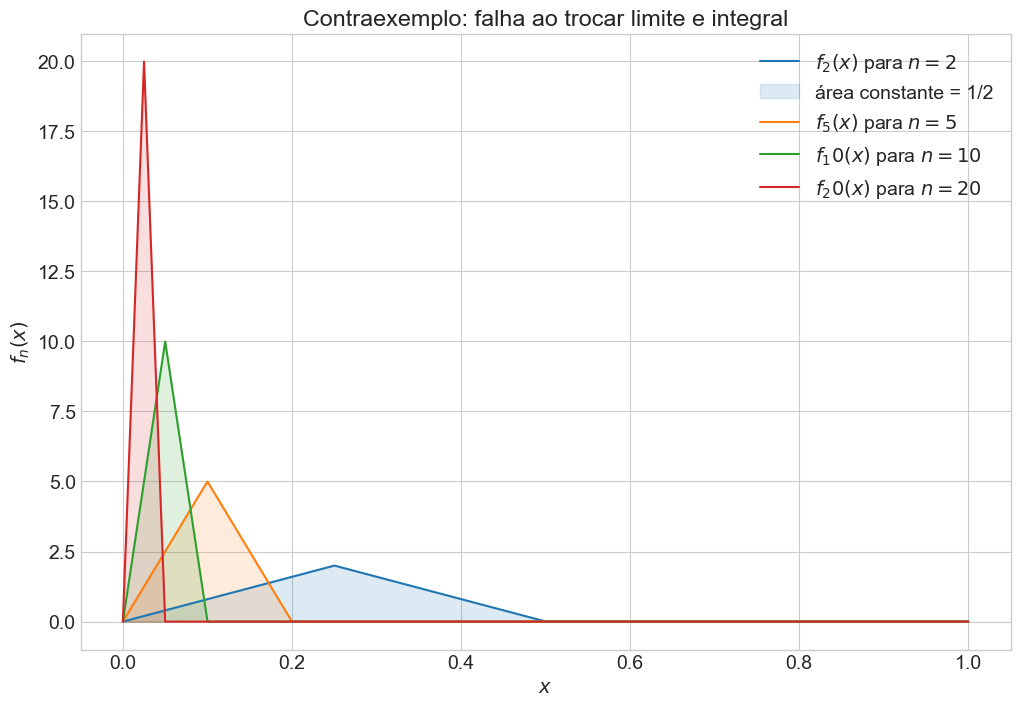

In [8]:
def f_n_peak(x, n):
    if n == 0: return np.zeros_like(x)
    
    conditions = [
        (x >= 0) & (x <= 1/(2*n)),
        (x > 1/(2*n)) & (x <= 1/n),
        (x > 1/n) & (x <= 1)
    ]
    
    functions = [
        lambda x: 2 * n**2 * x,
        lambda x: 2*n - 2 * n**2 * x,
        lambda x: 0
    ]
    
    return np.piecewise(x, conditions, functions)

def plot_integral_contraexemplo():
    x = np.linspace(0, 1, 1000)
    
    plt.figure(figsize=(12, 8))
    
    added_area_label = False
    for n in [2, 5, 10, 20]:
        y = f_n_peak(x, n)
        line, = plt.plot(x, y, label=f'$f_{n}(x)$ para $n={n}$')
        # sombrear apenas na região onde y>0 (isto é, [0, 1/n])
        mask = y > 0
        area_label = 'área constante = 1/2' if not added_area_label else None
        plt.fill_between(x[mask], 0, y[mask], color=line.get_color(), alpha=0.15, label=area_label)
        if not added_area_label:
            added_area_label = True
        
    plt.title('Contraexemplo: falha ao trocar limite e integral')
    plt.xlabel('$x$')
    plt.ylabel('$f_n(x)$')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_integral_contraexemplo()

## 5. Convergência Uniforme e Derivação

A relação com a derivação é mais sutil: a convergência uniforme de $(f_n)$ para $f$ sozinha não garante que $(f'_n)$ convirja para $f'$. Para passar o limite pela derivada, precisamos de hipóteses adicionais.

### Preliminares essenciais

1) Teorema do Valor Médio (TVM). Se $h$ é derivável em $[u,v]$, então existe $c\in(u,v)$ tal que
$$h(v)-h(u)=h'(c)(v-u).$$

2) Critério de Cauchy para convergência uniforme. $(g_n)$ converge uniformemente em $J$ se, e somente se, para todo $\varepsilon>0$ existe $N$ tal que, para todos $m,n\ge N$ e todo $x\in J$, vale $|g_m(x)-g_n(x)|<\varepsilon$.

3) Passagem de limite em desigualdades simples. Se $a_n\to a$, $b_n\to b$ e $a_n\le x_n\le b_n$ para todo $n$ grande, então $a\le \liminf x_n \le \limsup x_n\le b$. Caso útil: se $|x_n|\le \varepsilon$ para todo $n\ge N(\varepsilon)$, então qualquer limite de $(x_n)$ tem módulo $\le \varepsilon$.

4) Ponto âncora. Se sabemos que $(f_n(x_0))$ converge num ponto $x_0\in J$, o TVM controla $f_n(x)$ para $x\in J$ via $f'_n$ ao longo do segmento entre $x_0$ e $x$.

Observação. Basta que $J$ seja um intervalo (aberto, fechado ou semiaberto). Aplicaremos o TVM em subintervalos fechados $[u,v]\subset J$.

### Teorema (passagem ao limite na derivação)

Seja $J\subseteq \mathbb{R}$ um intervalo e $(f_n)$ funções deriváveis em $J$. Suponha que existe $x_0\in J$ tal que $(f_n(x_0))$ converge e que as derivadas $(f'_n)$ convergem uniformemente em $J$ para uma função $g$. Então:
- $(f_n)$ converge uniformemente em $J$ para alguma $f$;
- $f$ é derivável em todo $J$ e $f'=g$.

### Intuição
A uniformidade em $(f'_n)$ controla as inclinações em todo $J$. O ponto âncora $x_0$ fixa a “constante de integração”, impedindo translações verticais diferentes para cada $n$. Assim, $(f_n)$ fica de Cauchy em norma sup. Para $f'=g$, comparamos os quocientes diferenciais de $f_n$ (que pelo TVM igualam $f'_n$ em algum ponto) com o limite $g$.

### Demonstração detalhada

Parte A: $(f_n)$ é de Cauchy uniforme (logo converge uniformemente para $f$)

Sejam $m,n\in\mathbb{N}$ e $x\in J$. Pelo TVM aplicado a $f_m-f_n$ em $[x_0,x]$, existe $c=c(n,m,x)$ entre $x_0$ e $x$ tal que
$$ f_m(x)-f_n(x)=(f_m(x_0)-f_n(x_0))+(f'_m(c)-f'_n(c))(x-x_0). $$
Logo,
$$ |f_m(x)-f_n(x)|\le |f_m(x_0)-f_n(x_0)|+\|f'_m-f'_n\|_{\infty,J}\,|x-x_0|. $$
Como $(f_n(x_0))$ é de Cauchy (pois converge) e $(f'_n)$ é de Cauchy uniforme (pois converge uniformemente), dado $\varepsilon>0$ existe $N$ tal que, para $m,n\ge N$ e todo $x\in J$,
$$ |f_m(x)-f_n(x)|<\varepsilon. $$
Pelo critério de Cauchy uniforme, $(f_n)$ converge uniformemente em $J$ para alguma $f$. Em particular, $f$ é contínua (limite uniforme de contínuas).

Parte B: $f'=g$

Fixe $c\in J$. Para $x\ne c$ e $m,n\in\mathbb{N}$, pelo TVM aplicado a $f_m-f_n$ em $[c,x]$, existe $d=d(n,m,x)$ entre $c$ e $x$ tal que
$$ \frac{f_m(x)-f_m(c)}{x-c}-\frac{f_n(x)-f_n(c)}{x-c}=f'_m(d)-f'_n(d). \tag{1} $$
Da convergência uniforme de $(f'_n)$, dado $\varepsilon>0$ existe $N_1(\varepsilon)$ tal que, para $m,n\ge N_1(\varepsilon)$ e todo $x\ne c$,
$$ \left|\frac{f_m(x)-f_m(c)}{x-c}-\frac{f_n(x)-f_n(c)}{x-c}\right|\le \|f'_m-f'_n\|_{\infty,J}<\varepsilon. \tag{2} $$
Isto mostra que, para cada $x\ne c$, a sequência
$$ q_n(x):=\frac{f_n(x)-f_n(c)}{x-c} $$
é de Cauchy (uniformemente em $x\ne c$). Como $f_n\to f$ uniformemente, existe $N_2(\varepsilon)$ tal que, para $n\ge N_2(\varepsilon)$ e $x\ne c$,
$$ \left|\frac{f(x)-f(c)}{x-c}-\frac{f_n(x)-f_n(c)}{x-c}\right|<\varepsilon. \tag{3} $$
Além disso, como $g(c)=\lim_{n\to\infty}f'_n(c)$, existe $N_3(\varepsilon)$ tal que, para $n\ge N_3(\varepsilon)$,
$$ |f'_n(c)-g(c)|<\varepsilon. \tag{4} $$
Escolha $K:=\max\{N_1,N_2,N_3\}$. Como $f'_K(c)$ existe, pela definição de derivada há $\delta>0$ tal que, se $0<|x-c|<\delta$,
$$ \left|\frac{f_K(x)-f_K(c)}{x-c}-f'_K(c)\right|<\varepsilon. \tag{5} $$
Combinando (3), (5) (com $n=K$) e (4), obtemos, para $0<|x-c|<\delta$,
$$ \left|\frac{f(x)-f(c)}{x-c}-g(c)\right|\le \underbrace{\left|\frac{f(x)-f(c)}{x-c}-\frac{f_K(x)-f_K(c)}{x-c}\right|}_{<\,\varepsilon}\,+\,\underbrace{\left|\frac{f_K(x)-f_K(c)}{x-c}-f'_K(c)\right|}_{<\,\varepsilon}\,+\,\underbrace{|f'_K(c)-g(c)|}_{<\,\varepsilon}<3\varepsilon. $$
Como $\varepsilon>0$ é arbitrário, $$\lim_{x\to c}\frac{f(x)-f(c)}{x-c}=g(c),$$ isto é, $f$ é derivável em $c$ e $f'(c)=g(c)$. Como $c$ é arbitrário, $f$ é derivável em todo $J$ e $f'=g$.

Observações finais
- A hipótese de convergência uniforme de $(f'_n)$ é essencial. Exemplo: $f_n(x)=\sin(nx)/n$ tem $f_n\to0$ uniformemente, mas $f'_n(x)=\cos(nx)$ não converge.
- O ponto âncora $x_0$ garante controle das constantes de integração e impede translações por constantes diferentes entre os $f_n$.

A condição crucial aqui é a **convergência uniforme das derivadas**.

### Contraexemplo 1: Convergência uniforme de $f_n$ não implica convergência de $f'_n$

Considere a sequência $f_n(x) = \frac{\sin(nx)}{n}$ em $[0, 2\pi]$.
- **Convergência de $f_n$:** $|f_n(x)| = \left|\frac{\sin(nx)}{n}\right| \le \frac{1}{n}$. Portanto, $f_n \to 0$ uniformemente.
- **Derivadas $f'_n$:** $f'_n(x) = \cos(nx)$. Esta sequência não converge para a derivada do limite (que é 0). Por exemplo, em $x=\pi$, $f'_n(\pi) = \cos(n\pi) = (-1)^n$, que oscila e não converge.

Vamos visualizar $f_n$ e $f'_n$.

In [9]:
def plot_derivative_contraexemplo1(n_val=5):
    x = np.linspace(0, 2 * np.pi, 500)
    
    f_n = np.sin(n_val * x) / n_val
    f_n_prime = np.cos(n_val * x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot de f_n
    ax1.plot(x, f_n, 'b', label=f'$f_{{{n_val}}}(x)$')
    ax1.plot(x, np.zeros_like(x), 'r--', label='$f(x)=0$ (limite)')
    ax1.set_title(f'$f_n(x) = \sin({n_val}x)/{n_val}$')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$f_n(x)$')
    ax1.legend()
    ax1.grid(True)
    
    # Plot de f'_n
    ax2.plot(x, f_n_prime, 'g', label=f"$f'_{{{n_val}}}(x)$")
    ax2.plot(x, np.zeros_like(x), 'r--', label="f'(x)=0 (derivada do limite)")
    ax2.set_title(f"$f'_n(x) = \cos({n_val}x)$")
    ax2.set_xlabel('$x$')
    ax2.set_ylabel("$f'_n(x)$")
    ax2.legend()
    ax2.grid(True)
    
    plt.suptitle('Convergência de $f_n$ vs. Não Convergência de $f\'_n$', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

interact(
    plot_derivative_contraexemplo1,
    n_val=IntSlider(min=1, max=50, step=1, value=5, description='n')
);

interactive(children=(IntSlider(value=5, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

### Contraexemplo 2: Limite de funções deriváveis pode não ser derivável

Considere a sequência $f_n(x) = \sqrt{x^2 + \frac{1}{n}}$ em $[-1, 1]$.
- **Convergência de $f_n$:** Quando $n \to \infty$, $\frac{1}{n} \to 0$, então $f_n(x) \to \sqrt{x^2} = |x|$. A convergência é uniforme.
- **Derivabilidade:** Cada $f_n(x)$ é derivável em todo o intervalo $[-1, 1]$.
- **Função Limite:** A função limite $f(x) = |x|$ não é derivável em $x=0$.

Isso mostra que mesmo a convergência uniforme de funções deriváveis não garante a derivabilidade da função limite. O problema aqui é que a sequência das derivadas, $f'_n(x) = \frac{x}{\sqrt{x^2 + 1/n}}$, não converge uniformemente.

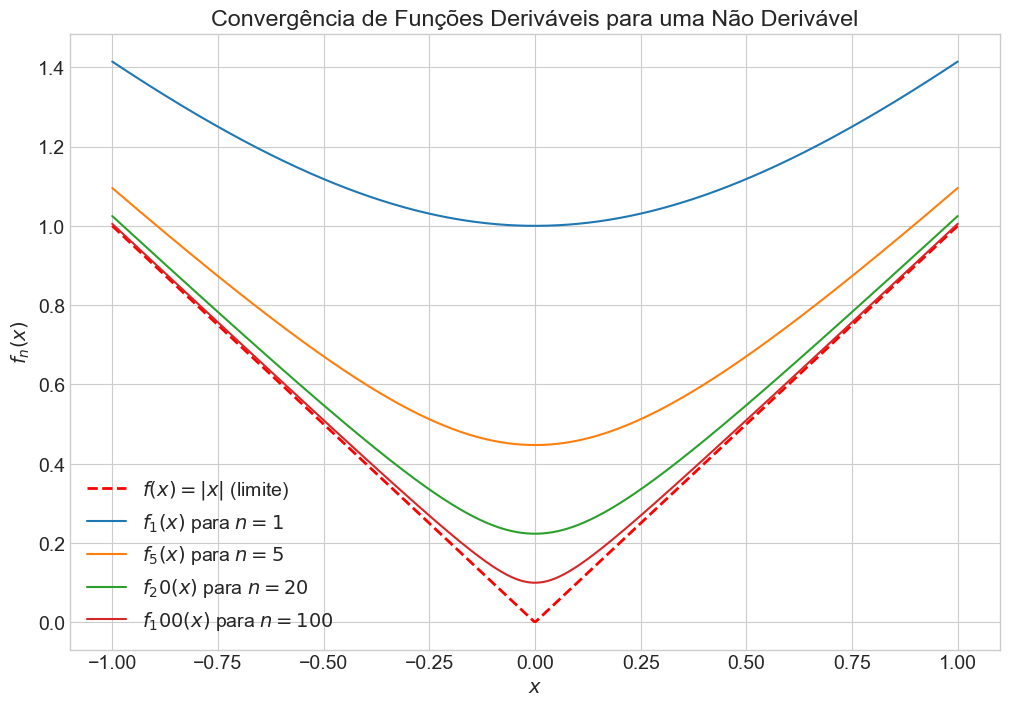

In [10]:
def plot_derivative_contraexemplo2():
    x = np.linspace(-1, 1, 500)
    
    f_limit = np.abs(x)
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(x, f_limit, 'r--', lw=2, label='$f(x) = |x|$ (limite)')
    
    for n in [1, 5, 20, 100]:
        f_n = np.sqrt(x**2 + 1/n)
        plt.plot(x, f_n, label=f'$f_{n}(x)$ para $n={n}$')
        
    plt.title('Convergência de Funções Deriváveis para uma Não Derivável')
    plt.xlabel('$x$')
    plt.ylabel('$f_n(x)$')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_derivative_contraexemplo2()

## Referências

- Bartle, R. G.; Sherbert, D. R. Introduction to Real Analysis. Wiley, 2000.

Recursos online
- Para todo ε — materiais e notas introdutórias: https://sites.google.com/usp.br/paratodoe/in%C3%ADcio
